In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,cutoff=50):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

In [3]:
data = load_dataset('synth_data/synth_case2.csv',Nmax=1000,cutoff=50)
th_gt = params2theta(torch.tensor((1e3,5*1e3,15*1e3)),
                     torch.tensor((100,300,1000)),
                     torch.tensor((1/6,1/2,2/6)))


In [4]:
data.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()

tensor(-3908.7475, device='cuda:0', dtype=torch.float64)

In [5]:
data.evaluate(tol=1e-5)

Iteration 1, x = [ 8.91311688 -0.54245799  0.        ], f(x) = 4.442944970371344
Iteration 2, x = [ 8.91678567 -0.53246119  0.        ], f(x) = 4.439842319553293
Iteration 3, x = [ 8.91818894 -0.52248283  0.        ], f(x) = 4.436770054524624
Iteration 4, x = [ 8.91515778 -0.51253131  0.        ], f(x) = 4.4338560057347465
Iteration 5, x = [ 8.91010848 -0.50260884  0.        ], f(x) = 4.430991704275422
Iteration 6, x = [ 8.90452692 -0.49271616  0.        ], f(x) = 4.428197117406755
Iteration 7, x = [ 8.8997736  -0.48285432  0.        ], f(x) = 4.425502415252994
Iteration 8, x = [ 8.89674955 -0.4730264   0.        ], f(x) = 4.422905392215653
Iteration 9, x = [ 8.8952273  -0.46323853  0.        ], f(x) = 4.42038404205329
Iteration 10, x = [ 8.89430638 -0.45349918  0.        ], f(x) = 4.417935607150927
Iteration 11, x = [ 8.89299113 -0.44381725  0.        ], f(x) = 4.415572504185175
Iteration 12, x = [ 8.89064541 -0.4342002   0.        ], f(x) = 4.413295523918711
Iteration 13, x = [ 8.887

(tensor([  972.2460,  4997.6556, 14937.4319], device='cuda:0',
        dtype=torch.float64),
 tensor([  79.4072,  337.7974, 1250.9194], device='cuda:0', dtype=torch.float64),
 tensor([0.1591, 0.5179, 0.3230], device='cuda:0', dtype=torch.float64))

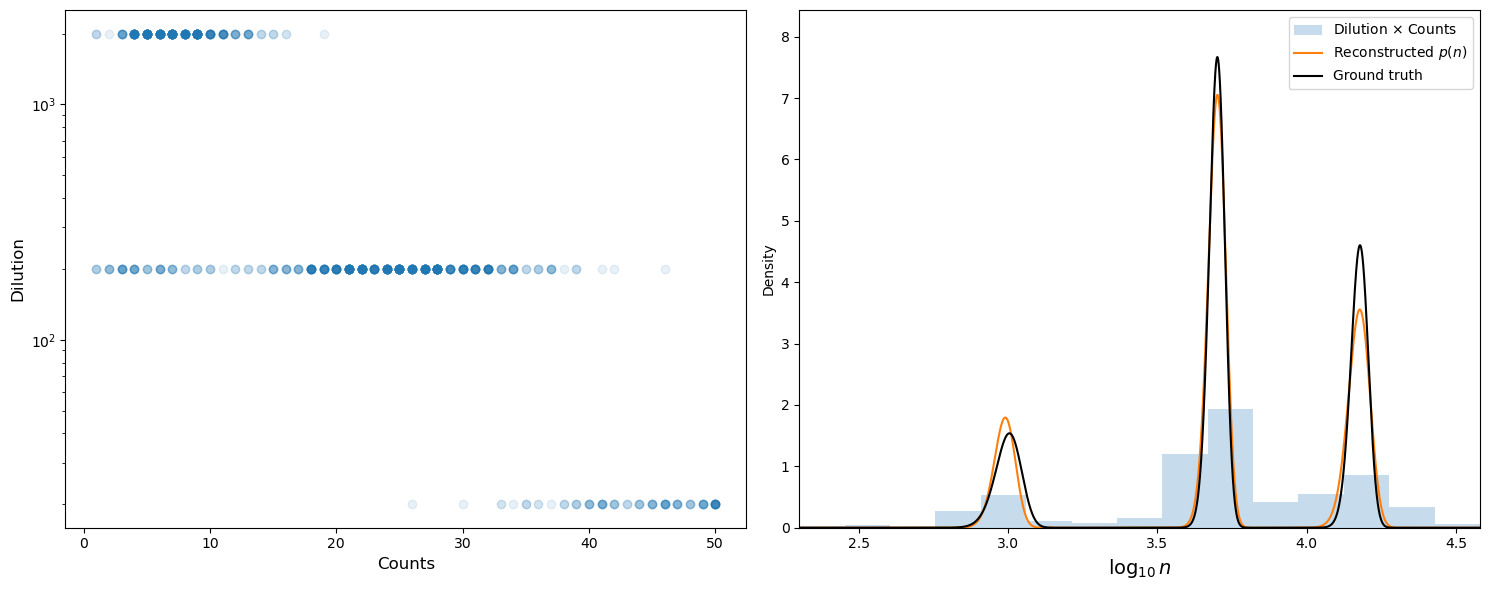

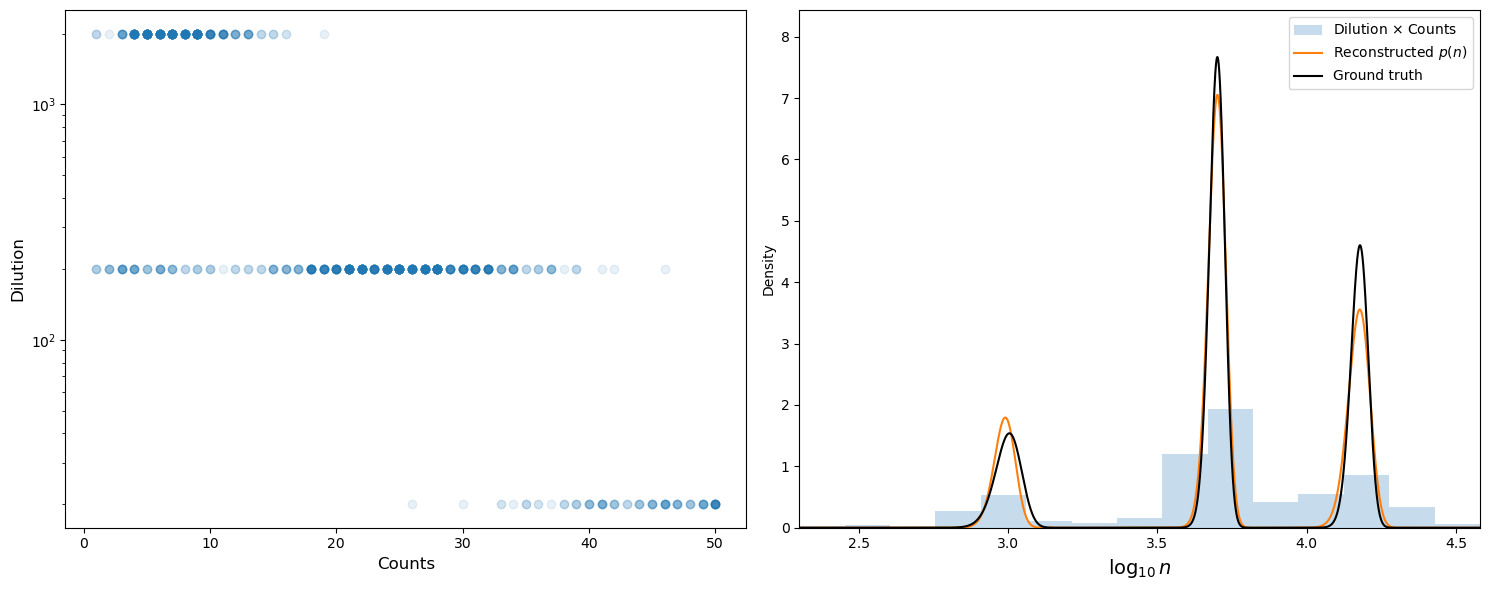

In [6]:
data.make_plot('graphs/synth/nonparam_densities_{}.png'.format(th_gt.numpy()),th_gt)

In [7]:
del data.lpkdil_n
del data

Iteration 1, x = [ 8.91311686 -0.54245799  0.        ], f(x) = 4.192034782060703
Iteration 2, x = [ 8.90312979 -0.53247686  0.        ], f(x) = 4.186516459690807
Iteration 3, x = [ 8.89316478 -0.52252678  0.        ], f(x) = 4.181253739887023
Iteration 4, x = [ 8.88323136 -0.5126194   0.        ], f(x) = 4.176243155483893
Iteration 5, x = [ 8.87333941 -0.50276571  0.        ], f(x) = 4.1714806428830045
Iteration 6, x = [ 8.86349915 -0.49297592  0.        ], f(x) = 4.16696158066335
Iteration 7, x = [ 8.85372109 -0.48325925  0.        ], f(x) = 4.162680829932499
Iteration 8, x = [ 8.84401604 -0.4736239   0.        ], f(x) = 4.158632775153996
Iteration 9, x = [ 8.83439507 -0.46407693  0.        ], f(x) = 4.154811364350948
Iteration 10, x = [ 8.82486944 -0.45462419  0.        ], f(x) = 4.15121014782214
Iteration 11, x = [ 8.81545058 -0.44527027  0.        ], f(x) = 4.147822314797203
Iteration 12, x = [ 8.80615004 -0.43601851  0.        ], f(x) = 4.144640727779284
Iteration 13, x = [ 8.7969

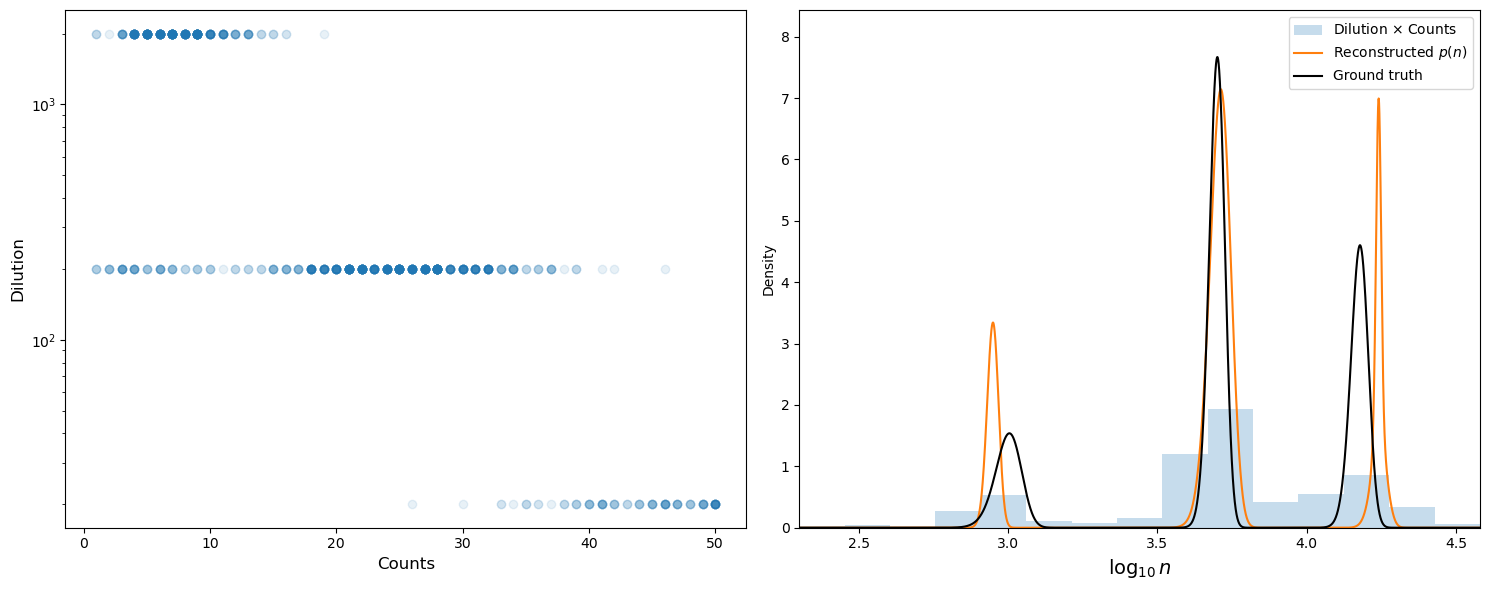

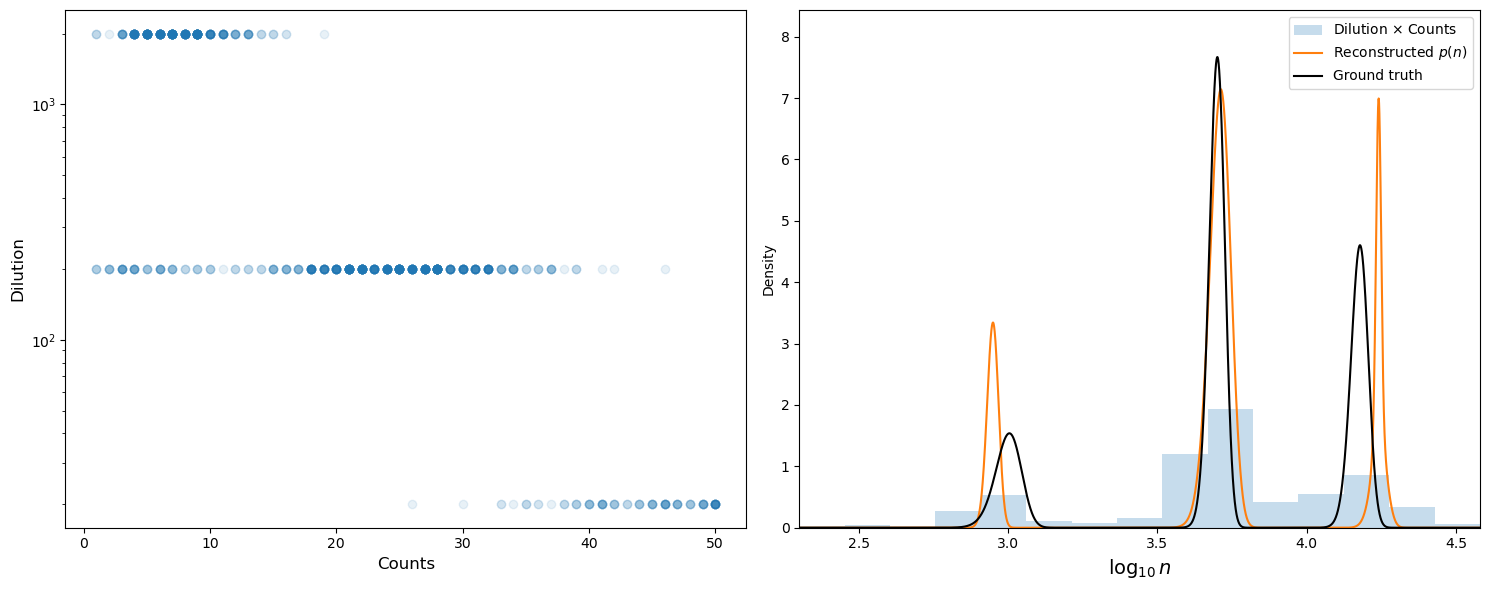

In [8]:
data = load_dataset('synth_data/synth_case2.csv',Nmax=1000,cutoff=-1)
th_gt = params2theta(torch.tensor((1e3,5*1e3,15*1e3)),
                     torch.tensor((100,300,1000)),
                     torch.tensor((1/6,1/2,2/6)))


data.evaluate(tol=1e-5)
data.make_plot('graphs/synth/nonparam_densities_{}_nocutoff.png'.format(th_gt.numpy()),th_gt)